<a href="https://colab.research.google.com/github/RohanKittu/Pneumonia-Detection_tensorflow/blob/master/Pneumonia_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [8]:
%cd '/content/gdrive/MyDrive/DeepLearning_GL/Projects/capstone_project'

/content/gdrive/MyDrive/DeepLearning_GL/Projects/capstone_project


In [9]:
!python --version

Python 3.7.13


In [ ]:
# import zipfile
# import os
# path_to_zip_file  = os.path.join('dataset','rsna-pneumonia-detection-challenge.zip')
# directory_to_extract = os.path.join(os.getcwd(),'dataset')
# with zipfile.ZipFile(path_to_zip_file, 'r') as zip_ref:
#     zip_ref.extractall(directory_to_extract)

In [5]:
!pip3 freeze > requirements.txt

All Import libraries

In [10]:
!pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.0 MB 27.3 MB/s 


In [ ]:
!pip install tensorflow-gpu

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [11]:
import pandas as pd
import numpy as np
import os
from pathlib import Path
import pydicom 
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
import cv2
from cv2 import imread,resize,INTER_AREA,flip
import random
random.seed(10)


import tensorflow as tf
from sklearn.model_selection import train_test_split
# example of loading the resnet50 model
%tensorflow_version 2.x
import tensorflow
from tensorflow.keras.applications.resnet_v2 import ResNet50V2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten
from tensorflow.keras import regularizers, optimizers
# import keras_tuner as kt
import statistics
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import load_img, array_to_img

In [ ]:
# %tensorflow_version 2.x
# device_name = tf.test.gpu_device_name()
# if device_name != '/device:GPU:0':
#   raise SystemError('GPU device not found')
# print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


## Pneumonia-Detection_tensorflow
## What is Pneumonia?
Pneumonia is an infection in one or both lungs. Bacteria, viruses, and fungi cause it. The infection causes inflammation in the air sacs in your lungs, which are called alveoli. Pneumonia accounts for over 15% of all deaths of children under 5 years old internationally. In 2017, 920,000 children under the age of 5 died from the disease. It requires review of a chest radiograph (CXR) by highly trained specialists and confirmation through clinical history, vital signs and laboratory exams. Pneumonia usually manifests as an area or areas of increased opacity on CXR. However, the diagnosis of pneumonia on CXR is complicated because of a number of other conditions in the lungs such as fluid overload (pulmonary edema), bleeding, volume loss (atelectasis or collapse), lung cancer, or post- radiation or surgical changes. Outside of the lungs, fluid in the pleural space (pleural effusion) also appears as increased opacity on CXR. When available, comparison of CXRs of the patient taken at different time points and correlation with clinical symptoms and history are helpful in making the diagnosis. CXRs are the most commonly performed diagnostic imaging study. A number of factors such as positioning of the patient and depth of inspiration can alter the appearance of the CXR, complicating interpretation further. In addition, clinicians are faced with reading high volumes of images every shift.

## Pneumonia Detection
Now to detection Pneumonia we need to detect Inflammation of the lungs. In this project, you’re challenged to build an algorithm to detect a visual signal for pneumonia in medical images. Specifically, your algorithm needs to automatically locate lung opacities on chest radiographs.

## Business Domain Value
Automating Pneumonia screening in chest radiographs, providing affected area details through bounding box. Assist physicians to make better clinical decisions or even replace human judgement in certain functional areas of healthcare (eg, radiology). Guided by relevant clinical questions, powerful AI techniques can unlock clinically relevant information hidden in the massive amount of data, which in turn can assist clinical decision making.

## Project description
In this capstone project, the goal is to build a pneumonia detection system, to locate the position of inflammation in an image. Tissues with sparse material, such as lungs which are full of air, do not absorb the X-rays and appear black in the image. Dense tissues such as bones absorb X-rays and appear white in the image. While we are theoretically detecting “lung opacities”, there are lung opacities that are not pneumonia related. In the data, some of these are labeled “Not Normal No Lung Opacity”. This extra third class indicates that while pneumonia was determined not to be present, there was nonetheless some type of abnormality on the image and oftentimes this finding may mimic the appearance of true pneumonia. Dicom original images: - Medical images are stored in a special format called DICOM files (*.dcm). They contain a combination of header metadata as well as underlying raw image arrays for pixel data. Details about the data and dataset files are given in below link, https://www.kaggle.com/c/rsna-pneumonia-detection-challenge/data

## Pre-Processing, Data Visualization, EDA
- Exploring the given Data files, classes and images of different classes. 
- Dealing with missing values 
- Visualization of different classes 
- Analysis from the visualization of different classes. Model Building 
- Building a pneumonia detection model starting from basic CNN and then improving upon it. 
- Train the model 
- To deal with large training time, save the weights so that you can use them when training the model for the second time without starting from scratch. Test the Model, Fine-tuning and Repeat 
- Test the model and report as per evaluation metrics 
- Try different models 
- Set different hyper parameters, by trying different optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. for these models to fine-tune them 
- Report evaluation metrics for these models along with your observation on howchanging different hyper parameters leads to change in the final evaluation metric.

## Project Objective
The objective of the project is, 
- Learn to how to do build an Object Detection Model 
- Use transfer learning to fine-tune a model. 
- Learn to set the optimizers, loss functions, epochs, learning rate, batch size, checkpointing, early stopping etc. 
- Read different research papers of given domain to obtain the knowledge of advanced models for the given problem.

## Project submissions and Evaluation Criteria
While we encourage peer collaboration and contribution, plagiarism, copying the code from other sources or peers will defeat the purpose of coming to this program. We expect the highest order of ethical behavior. Submit the project as given below. 
- Report with Problem Statement, Related Work, Your Approach and comparison of results with other models written in PDF. 
- Github link where the model is hosted. Evaluation Criteria: You must receive a minimum of 60% on each milestone to complete the project.

60 % Points = Complete 80 % Points = Excellent

**Dataware housing**

In [12]:
class_info_path:str = os.path.join('Capstone_CV_Project',
                                   'raw_data',
                                   'stage_2_detailed_class_info.csv',
                                   'stage_2_detailed_class_info.csv')
train_label_path:str = os.path.join('Capstone_CV_Project',
                                    'raw_data',
                                    'stage_2_train_labels.csv',
                                    'stage_2_train_labels.csv')
class_info:str = pd.read_csv(class_info_path)
class_info

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity


In [ ]:
# class_info_path:str = os.path.join('dataset','stage_2_detailed_class_info.csv')
# sample_sub_path:str = os.path.join('dataset','stage_2_sample_submission.csv')
# train_label_path:str = os.path.join('dataset','stage_2_train_labels.csv')
# class_info:str = pd.read_csv(class_info_path)
# class_info

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,Lung Opacity
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,Normal
30224,c1f6b555-2eb1-4231-98f6-50a963976431,Normal
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity


In [13]:
train_label:pd.DataFrame = pd.read_csv(train_label_path)
train_label

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...
30222,c1ec14ff-f6d7-4b38-b0cb-fe07041cbdc8,185.0,298.0,228.0,379.0,1
30223,c1edf42b-5958-47ff-a1e7-4f23d99583ba,NaN,NaN,NaN,NaN,0
30224,c1f6b555-2eb1-4231-98f6-50a963976431,NaN,NaN,NaN,NaN,0
30225,c1f7889a-9ea9-4acb-b64c-b737c929599a,570.0,393.0,261.0,345.0,1


In [14]:
train_label.isna().sum()/len(train_label)

patientId    0.000000
x            0.683892
y            0.683892
width        0.683892
height       0.683892
Target       0.000000
dtype: float64

In [15]:
labels_info:pd.DataFrame  = pd.merge(class_info,train_label,on = 'patientId', how='inner')
# labels_info = labels_info.drop_duplicates("patientId")
labels_info

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...,...
37624,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,NaN,NaN,NaN,NaN,0
37625,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1
37626,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,233.0,424.0,201.0,356.0,1
37627,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1


In [ ]:
# train_folder_name:str = 'stage_2_train_images'
# test_folder_name:str = 'stage_2_test_images' 
# train_folder_path:str = os.path.join('dataset',
#                                  train_folder_name)
# test_folder_path:str = os.path.join('dataset',
#                                  test_folder_name)
# list_train_file_names:list = list(os.listdir(train_folder_path))
# list_test_file_names:list = list(os.listdir(test_folder_path))

In [16]:
train_folder_name:str = 'stage_2_train_images'
test_folder_name:str = 'stage_2_test_images' 
train_folder_path:str = os.path.join('Capstone_CV_Project',
                                     'raw_data',
                                     train_folder_name)
test_folder_path:str = os.path.join('Capstone_CV_Project',
                                    'raw_data',
                                    test_folder_name)

In [19]:
list_train_file_names:list = list(os.listdir(train_folder_path))
list_test_file_names:list = list(os.listdir(test_folder_path))

In [ ]:
len(labels_info['patientId'].unique())

26684

In [ ]:
labels_info

,patientId,class,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity,264.0,152.0,213.0,379.0,1
...,...,...,...,...,...,...,...
37624,c1f6b555-2eb1-4231-98f6-50a963976431,Normal,NaN,NaN,NaN,NaN,0
37625,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1
37626,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,233.0,424.0,201.0,356.0,1
37627,c1f7889a-9ea9-4acb-b64c-b737c929599a,Lung Opacity,570.0,393.0,261.0,345.0,1


In [17]:
data_frequency = labels_info['patientId'].value_counts().reset_index()
data_frequency = data_frequency.sort_values(by='patientId', ascending=False)
data_frequency

,index,patientId
0,3239951b-6211-4290-b237-3d9ad17176db,16
7,32408669-c137-4e8d-bd62-fe8345b40e73,16
12,0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d,16
11,ee820aa5-4804-4984-97b3-f0a71d69702f,16
10,1bf08f3b-a273-4f51-bafa-b55ada2c23b5,16
...,...,...
11157,f1d94ffb-f4ee-4e30-a376-90c51b843f90,1
11156,f8f84dd5-5c41-4f63-9d3b-23e6e04d7fe8,1
11155,f1d1ceac-9e6d-4ca8-b0da-f918df585511,1
11154,f1dfb6c6-9b3c-490c-b525-9c2c51252c6e,1


In [20]:
pat_list:list = []
pat_freq_list = []
image_freq_list = []
for index in range(0,len(data_frequency)):
  pat_id = data_frequency.iloc[index]['index']
  pat_freq = data_frequency.iloc[index]['patientId']
  freq_images = len([value for value in list_train_file_names if value[:-4] == pat_id])
  pat_list.append(pat_id)
  pat_freq_list.append(pat_freq)
  image_freq_list.append(freq_images)

records:pd.DataFrame = pd.DataFrame({'patient_id':pat_list,
              'patient_frequency':pat_freq_list,
              'image_frequency':image_freq_list})
records

,patient_id,patient_frequency,image_frequency
0,3239951b-6211-4290-b237-3d9ad17176db,16,1
1,32408669-c137-4e8d-bd62-fe8345b40e73,16,1
2,0e03c2d7-9cea-4dc7-8e91-794a8b3ff58d,16,1
3,ee820aa5-4804-4984-97b3-f0a71d69702f,16,1
4,1bf08f3b-a273-4f51-bafa-b55ada2c23b5,16,1
...,...,...,...
26679,f1d94ffb-f4ee-4e30-a376-90c51b843f90,1,1
26680,f8f84dd5-5c41-4f63-9d3b-23e6e04d7fe8,1,1
26681,f1d1ceac-9e6d-4ca8-b0da-f918df585511,1,1
26682,f1dfb6c6-9b3c-490c-b525-9c2c51252c6e,1,1


In [ ]:
records.sort_values(by='image_frequency', ascending=False)

,patient_id,patient_frequency,image_frequency
0,3239951b-6211-4290-b237-3d9ad17176db,16,1
17928,abd50515-15ea-489a-bdb8-c38dd3ef0b36,1,1
17796,295de041-5711-400a-8241-7d7cf500971e,1,1
17795,a7fb334c-5fa6-460a-8115-294dfc821187,1,1
17794,ac710523-7dfb-4d63-821c-34b2d6ef03d7,1,1
...,...,...,...
8891,582eabe9-86dd-45ea-958c-f53068114db2,1,1
8890,582e641d-ac17-43b5-89a0-453555dd152e,1,1
8889,582dedfc-19d7-446a-acd3-b8a7081ae664,1,1
8888,5828e978-162a-4726-82e3-a057474d6b8a,1,1


In [ ]:
labels_info.isna().sum()/len(labels_info)

patientId    0.000000
class        0.000000
x            0.549364
y            0.549364
width        0.549364
height       0.549364
Target       0.000000
dtype: float64

In [ ]:
labels_info[labels_info['x'].isna()]['class'].unique()

array(['No Lung Opacity / Not Normal', 'Normal'], dtype=object)

So we could infer that, we dont have coordinates for those patients who have below status
- No Lung Opacity/ Not Normal
- Normal.
As our model task is to only detect the pneumonia, So we got coordinates for only those cases. 

In [ ]:
labels_info[labels_info['x'].isna()]['Target'].unique()

array([0])

Loading the pixel information of images

path settings!!

In [21]:
list_train_file_names:list = list(os.listdir(train_folder_path))

In [ ]:
filtered_labels:pd.DataFrame = labels_info[labels_info['patientId'] == '3239951b-6211-4290-b237-3d9ad17176db']
filtered_labels.drop_duplicates()

,patientId,class,x,y,width,height,Target
3411,3239951b-6211-4290-b237-3d9ad17176db,Lung Opacity,511.0,249.0,188.0,232.0,1
3412,3239951b-6211-4290-b237-3d9ad17176db,Lung Opacity,558.0,649.0,174.0,186.0,1
3413,3239951b-6211-4290-b237-3d9ad17176db,Lung Opacity,152.0,661.0,191.0,145.0,1
3414,3239951b-6211-4290-b237-3d9ad17176db,Lung Opacity,198.0,370.0,204.0,205.0,1


In [ ]:
def get_dicom_info()->pd.DataFrame:
  #train_pixels:list = []
  patient_ids_list:list = []
  labels:list = []
  label_encoded:list = []
  gender:list = []
  age:list = []
  view_position:list = []
  modality:list = []
  # x_coordinate_values:list = []
  # y_coordinate_values:list = []
  # width_coordinate_values:list = []
  # height_coordinate_values:list = []
  coordinates_list = []
  rows_list = []
  columns_list = []
  count:int = 0
  buffer:int = 1
  #iterating through the files on the training folder
  for file_name in list_train_file_names:
    path_image:str = os.path.join(train_folder_path,file_name)
    #reading the dicom image!!
    dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
    #extracting the information from labes files for the following image!!
    filtered_labels:pd.DataFrame = labels_info[labels_info['patientId'] == dicom_obj.PatientID]
    #extracting the patient ids
    patient_ids_list.append(dicom_obj.PatientID)
    #extracting the encoded value of the target varaible
    label_encoded.append(
        int(filtered_labels['Target'].iloc[0])
    )
    #extracting the actual class name
    labels.append(
        filtered_labels['class'].iloc[0]
    )
    #extracting the coordinates
    #if we have more the one coordinates for image.
    if filtered_labels.shape[0] > 1:
      buffer_list:list = []
      filtered_labels:pd.DataFrame = filtered_labels.drop_duplicates()
      for index in range(0,filtered_labels.shape[0]):
        buffer_list.append([
            filtered_labels.iloc[index]['x'],
            filtered_labels.iloc[index]['y'],
            filtered_labels.iloc[0]['width'],
            filtered_labels.iloc[0]['height']
        ])
      coordinates_list.append(buffer_list)
    #if we got only one bounding box in the image!!
    else:
      coordinates_list.append(
          [
           filtered_labels.iloc[0]['x'],
           filtered_labels.iloc[0]['y'],
           filtered_labels.iloc[0]['width'],
           filtered_labels.iloc[0]['height']
          ]
      )
    # x_coordinate_values.append(
    #     filtered_labels['x'].iloc[0]
    # )
    # y_coordinate_values.append(
    #     filtered_labels['y'].iloc[0]
    # )
    # width_coordinate_values.append(
    #     filtered_labels['width'].iloc[0]
    # )
    # height_coordinate_values.append(
    #     filtered_labels['height'].iloc[0]
    # )
    gender.append(dicom_obj.PatientSex)
    
    #extracting age from dicom header 
    age.append(dicom_obj.PatientAge)
    #extracting view position from dicom header
    view_position.append(dicom_obj.ViewPosition)
    #extracting modality from dicom header
    modality.append(dicom_obj.Modality)
    #extracting number of rows from dicom header
    rows_list.append(dicom_obj.Rows)
    #extracting number of columns from dicom header
    columns_list.append(dicom_obj.Columns)
    #train_pixels.append(dicom_obj.pixel_array)
    count+=1
    percentage = int((count/len(list_train_file_names))*100)
    if percentage >= buffer:
      print(f'--------{percentage}% images information retrived from {len(list_train_file_names)} images----------')
      buffer+=1

  info_dicom_header:pd.DataFrame = pd.DataFrame({'Patient_ids':patient_ids_list,
              'Class':labels,
              'Encoded_class':label_encoded,
              'Gender':gender,
              'Age':age,
              'View_position':view_position,
              'Modality':modality,
              'coordinates':coordinates_list,
              'No_rows':rows_list,
              'No_columns':columns_list})
  #train_pixels:np.array = np.array(train_pixels)
  return info_dicom_header

Uncomment to load the data back

In [ ]:
coordinates_info = get_dicom_info()
process_storage_folder_path:str = os.path.join(os.getcwd(),'pre_processed_data_set') 
saved_file_name_coordinates:str = os.path.join(process_storage_folder_path, "coordinates_org.pkl")

--------1% images information retrived from 26684 images----------
--------2% images information retrived from 26684 images----------
--------3% images information retrived from 26684 images----------
--------4% images information retrived from 26684 images----------
--------5% images information retrived from 26684 images----------
--------6% images information retrived from 26684 images----------
--------7% images information retrived from 26684 images----------
--------8% images information retrived from 26684 images----------
--------9% images information retrived from 26684 images----------
--------10% images information retrived from 26684 images----------
--------11% images information retrived from 26684 images----------
--------12% images information retrived from 26684 images----------
--------13% images information retrived from 26684 images----------
--------14% images information retrived from 26684 images----------
--------15% images information retrived from 26684 images

saving the file!!

In [ ]:
coordinates_info.to_pickle(saved_file_name_coordinates)

loading the saved file!!

In [ ]:
process_storage_folder_path:str = os.path.join(os.getcwd(),'pre_processed_data_set') 
saved_file_name_coordinates:str = os.path.join(process_storage_folder_path, "coordinates_org.pkl")
coordinates_info:pd.DataFrame = pd.read_pickle(saved_file_name_coordinates)
coordinates_info

,Patient_ids,Class,Encoded_class,Gender,Age,View_position,Modality,coordinates,No_rows,No_columns
0,f74e692e-1ccd-4f5e-bc19-482325025a41,Normal,0,F,62,AP,CR,"[nan, nan, nan, nan]",1024,1024
1,f7909c0c-c9f0-4c93-be7f-113926850ac3,No Lung Opacity / Not Normal,0,F,81,AP,CR,"[nan, nan, nan, nan]",1024,1024
2,f758a20a-506d-4e4e-97d7-54043148fb59,Normal,0,M,45,PA,CR,"[nan, nan, nan, nan]",1024,1024
3,f78a62d0-f9aa-4828-ad8c-ec4917f52d48,Lung Opacity,1,F,66,AP,CR,"[181.0, 695.0, 195.0, 187.0]",1024,1024
4,f7a5fd29-dd8d-4f85-8164-69b2e83da35e,Normal,0,M,50,PA,CR,"[nan, nan, nan, nan]",1024,1024
...,...,...,...,...,...,...,...,...,...,...
26679,0986f27b-74ed-4bc7-9595-e40b345cb161,No Lung Opacity / Not Normal,0,M,52,AP,CR,"[nan, nan, nan, nan]",1024,1024
26680,094eed38-9c5b-4042-936d-344ccec4c3cc,Lung Opacity,1,F,65,AP,CR,"[[122.0, 350.0, 300.0, 450.0], [544.0, 346.0, ...",1024,1024
26681,0983ae59-b906-4fd5-a810-edfe0580fe3b,Lung Opacity,1,M,59,PA,CR,"[212.0, 333.0, 224.0, 391.0]",1024,1024
26682,098fdba1-4918-40e8-bb74-9945214c8bd5,Normal,0,F,45,AP,CR,"[nan, nan, nan, nan]",1024,1024


**EDA**

In [ ]:
print(f'The unique row size of images {coordinates_info.No_rows.unique()}')
print(f'The unique column size of images {coordinates_info.No_columns.unique()}')

The unique row size of images [1024]
The unique column size of images [1024]


In [ ]:
print(f'The unique Modalitys {coordinates_info.Modality.unique()}')

The unique Modalitys ['CR']


All images in our sample of data are square images where there size is 1024*1024

In [ ]:
coordinates_info['Age'] = coordinates_info['Age'].astype('int')

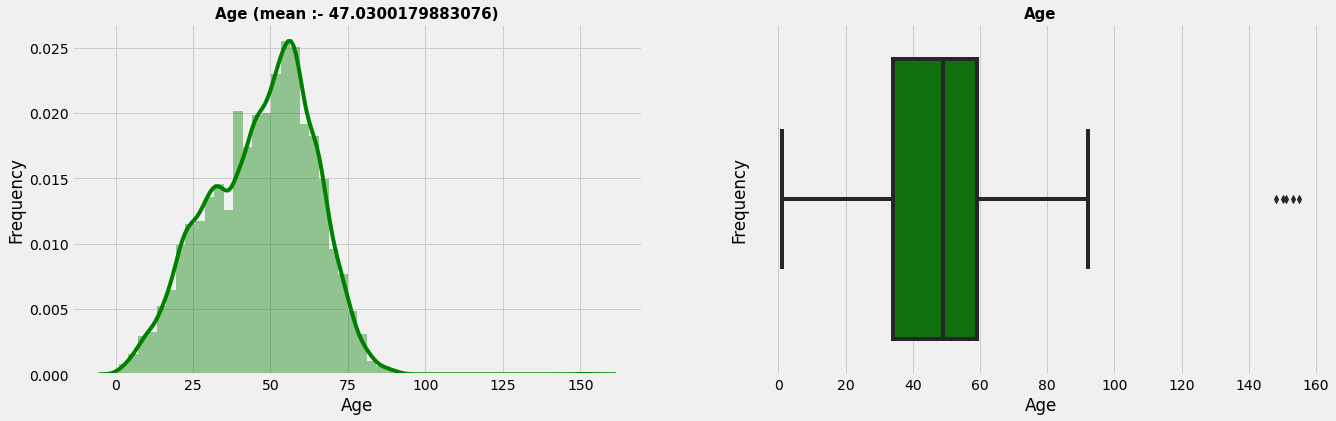

In [ ]:
import warnings
warnings.filterwarnings("ignore")
all_colors: list = [
    "blue",
    "green",
    "yellow",
    "pink",
    "orange",
    "purple",
    "brown",
    "red",
]
col = np.random.choice(all_colors)
# variable 1
plt.style.use("fivethirtyeight")
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
plt.title('Age (mean :- '+str(coordinates_info['Age'].astype('int').mean())+')', fontweight="bold", fontsize=15)
plt.ylabel("Frequency")
sns.distplot(coordinates_info['Age'], color=col)

plt.subplot(1, 2, 2)
plt.title('Age', fontweight="bold", fontsize=15)
plt.ylabel("Frequency")
sns.boxplot(coordinates_info['Age'].astype('int'), orient="vertical", color=col)
plt.show()

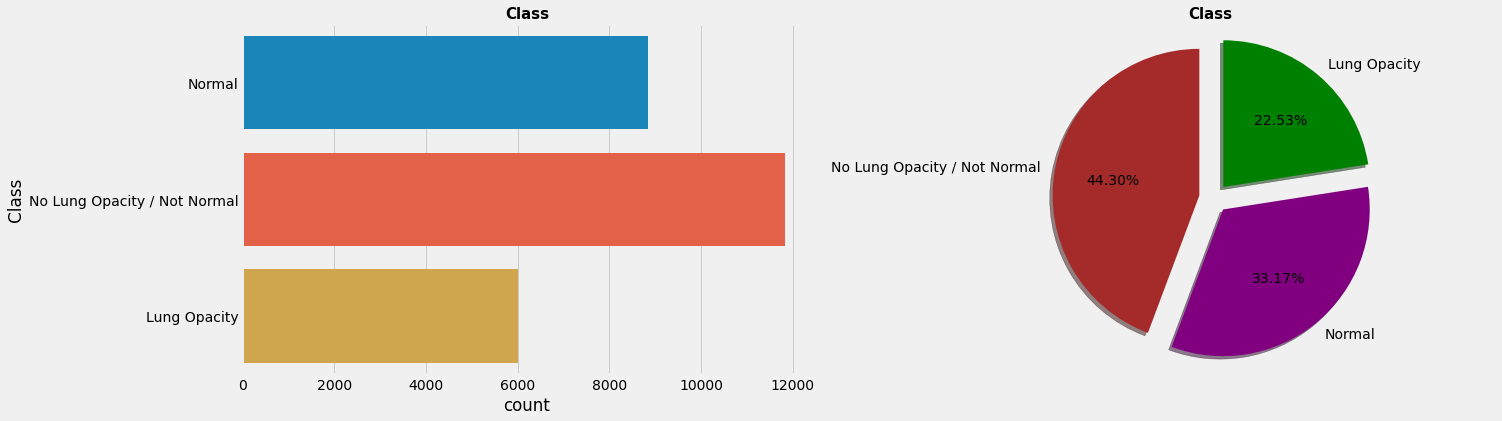

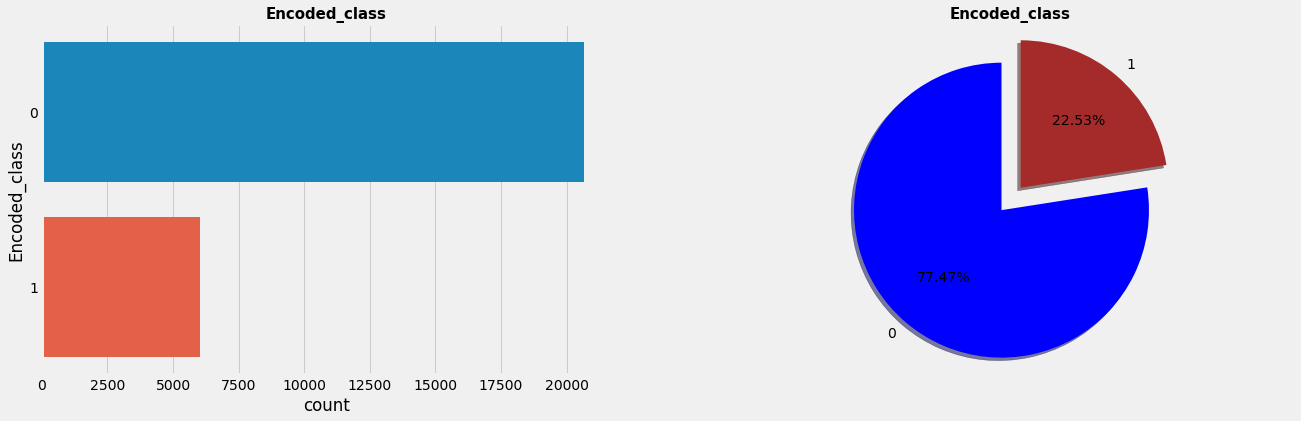

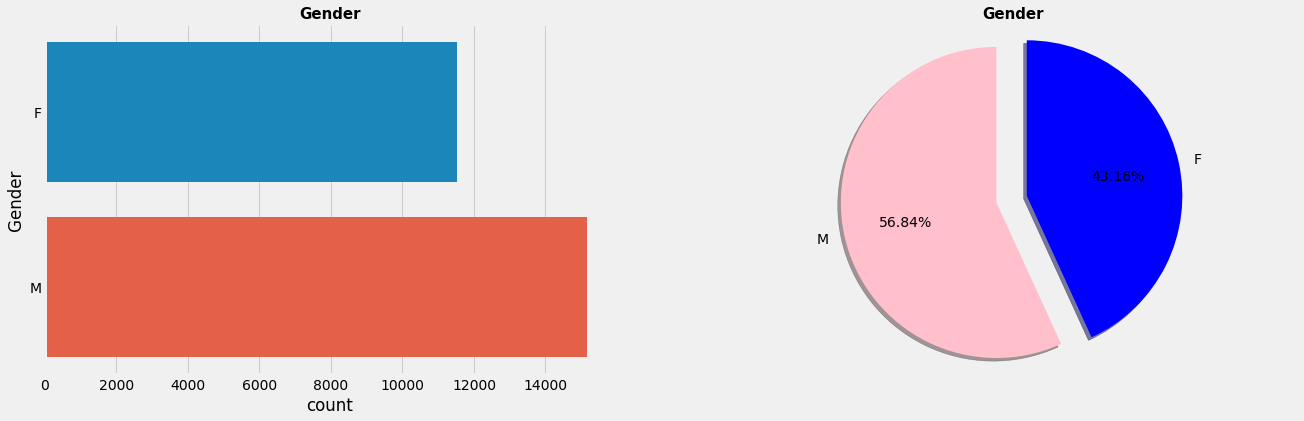

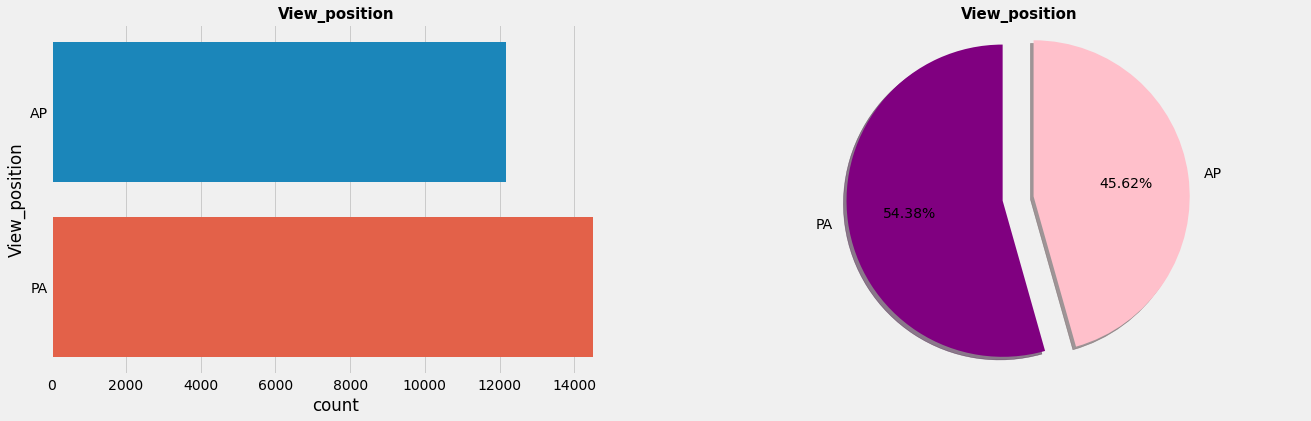

In [ ]:
categorical_column_names = ['Class',
                            'Encoded_class',
                            'Gender',
                            'View_position']
for category_variable in categorical_column_names:
    #fig 1
    plt.style.use("fivethirtyeight")
    plt.figure(figsize=(20,6))
    plt.subplot(1, 2, 1)
    plt.title(category_variable,fontweight="bold",fontsize=15)
    sns.countplot(y=category_variable, data=coordinates_info)

    plt.subplot(1, 2, 2)
    plt.title(category_variable,fontweight="bold",fontsize=15)
    explode = []
    colors = []
    for ex in coordinates_info[category_variable].unique():
        explode.append(0.1)
        colors.append(np.random.choice(all_colors))
    plt.pie(coordinates_info[category_variable].value_counts().reset_index()[category_variable],labels=coordinates_info[category_variable].value_counts().reset_index()['index'], colors=colors, startangle=90, shadow=True,explode=tuple(explode), autopct='%1.2f%%')
    plt.axis('equal')
plt.show()

we can infer from the above visulation,

- Encoded_class :- We have class imbalance problem in our dataset, where we have only 22% of patients who got effected by pneumonia

- we can also see from the view position that we got two different view points of medical images.

- AP - erect anteroposterior chest view is an alternative to the PA view when the patient is too unwell to tolerate standing or leaving the bed 

- PA - Chest Posterior Anterior 

In [ ]:
coordinates_info.groupby(['View_position']).count()/len(coordinates_info)

,Patient_ids,Class,Encoded_class,Gender,Age,Modality,coordinates,No_rows,No_columns
View_position,,,,,,,,,
AP,0.456191,0.456191,0.456191,0.456191,0.456191,0.456191,0.456191,0.456191,0.456191
PA,0.543809,0.543809,0.543809,0.543809,0.543809,0.543809,0.543809,0.543809,0.543809


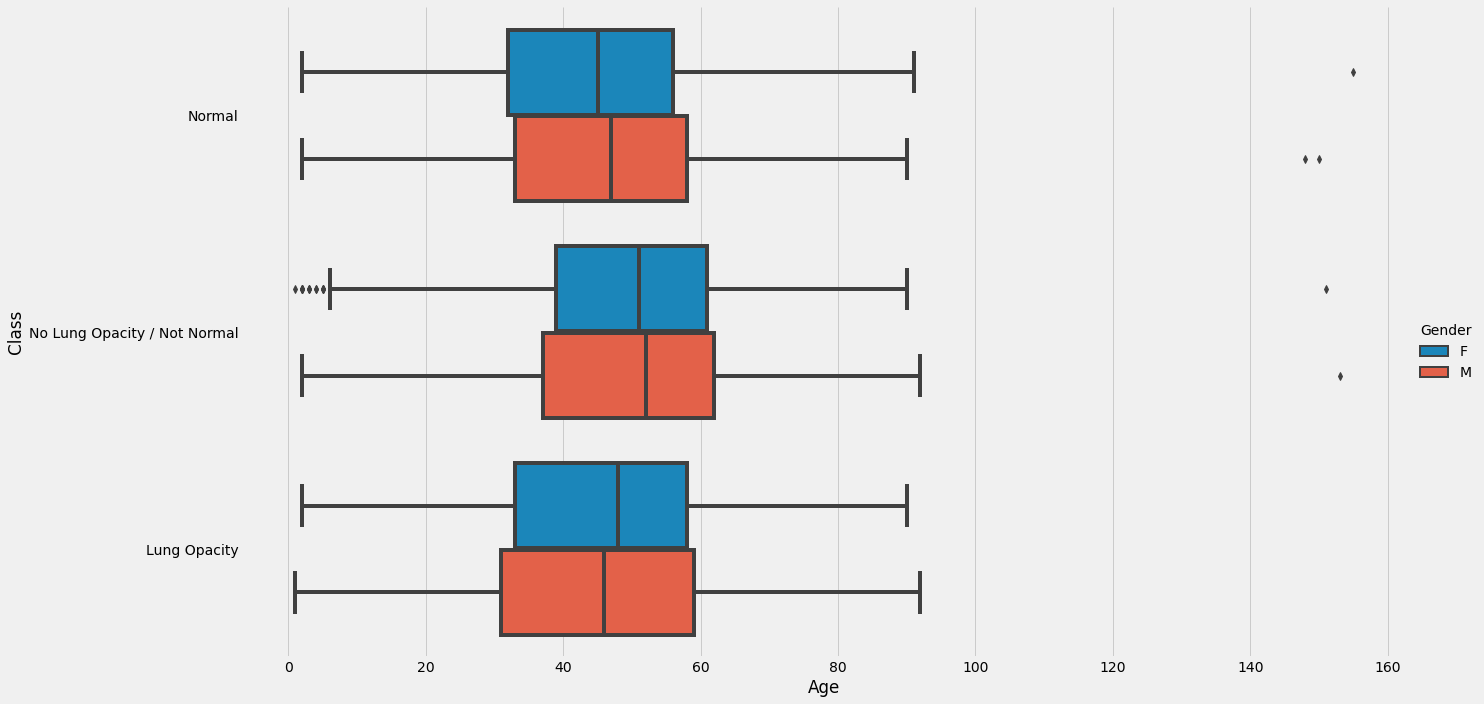

In [ ]:
sns.catplot(x="Age", y="Class", kind="box",hue="Gender", data=coordinates_info,orient="h",height=10, aspect=2)

#### Images which contain Lung Opacity

**viewing AP view**

In [ ]:
filtered_ap_data:pd.DataFrame = coordinates_info.loc[(coordinates_info.View_position == 'AP') & (coordinates_info.Encoded_class == 1)]
filtered_ap_data.head(2)

,Patient_ids,Class,Encoded_class,Gender,Age,View_position,Modality,coordinates,No_rows,No_columns
3,f78a62d0-f9aa-4828-ad8c-ec4917f52d48,Lung Opacity,1,F,66,AP,CR,"[181.0, 695.0, 195.0, 187.0]",1024,1024
8,f7a42b73-f909-4e1f-89dd-c776f45cdc40,Lung Opacity,1,M,34,AP,CR,"[[638.0, 367.0, 250.0, 519.0], [178.0, 341.0, ...",1024,1024


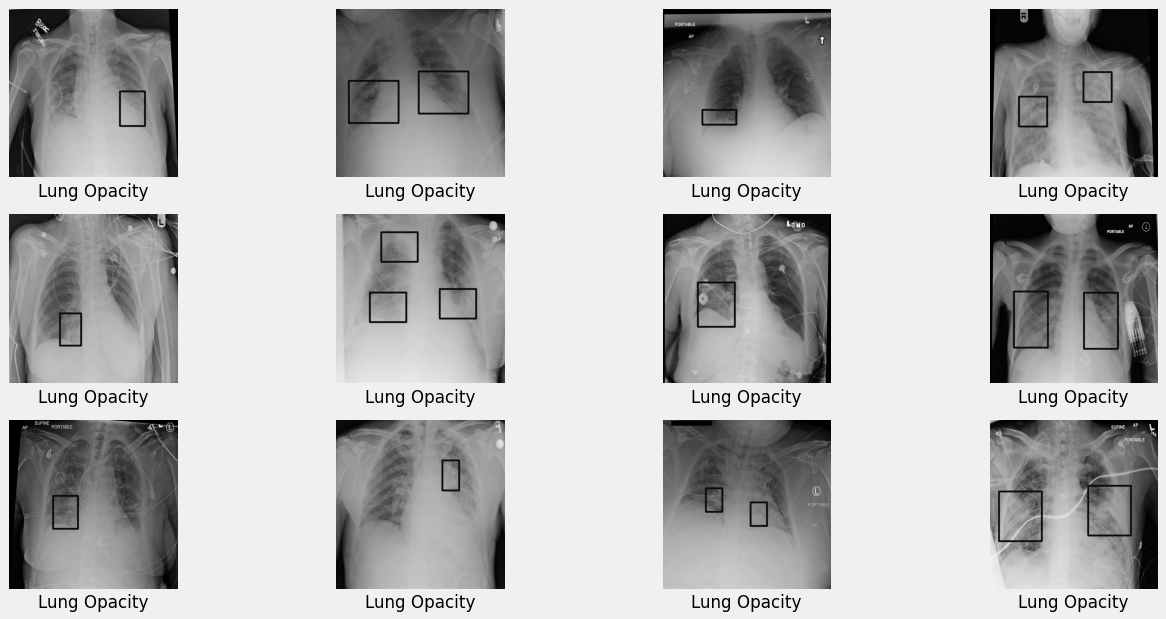

In [ ]:
no_images:int = 12
rows_to_display:list = random.sample(list(filtered_ap_data.index), no_images)
random.seed(13)
plt.figure(figsize=(20,10))
num:int = 0
for index_number in rows_to_display:
  num+=1
  plt.subplot(3,4,num)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  path_image:str = os.path.join(train_folder_path,
                                filtered_ap_data.loc[index_number].Patient_ids+'.dcm')
  dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
  pixel_values:np.array = dicom_obj.pixel_array
  if type(filtered_ap_data.loc[index_number].coordinates[0]) == list:
    for coordinate in filtered_ap_data.loc[index_number].coordinates:
      cv2.rectangle(pixel_values, (int(coordinate[0]),
                                   int(coordinate[1])),
                     (int(coordinate[0])+int(coordinate[2]),
                      int(coordinate[1])+int(coordinate[3])), (10, 255, 0), 10)
  else:
    coordinate:list = filtered_ap_data.loc[index_number].coordinates
    cv2.rectangle(pixel_values, (int(coordinate[0]),
                                 int(coordinate[1])),
                   (int(coordinate[0])+int(coordinate[2]), int(coordinate[1])+int(coordinate[3])), (10, 255, 0), 10)
  plt.imshow(cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB),cmap="gray")
  plt.xlabel(filtered_ap_data.loc[index_number].Class)
plt.show()

**viewing PA view**

In [ ]:
filtered_pa_data:pd.DataFrame = coordinates_info.loc[(coordinates_info.View_position == 'PA') & (coordinates_info.Encoded_class == 1)]
filtered_pa_data.head(2)

,Patient_ids,Class,Encoded_class,Gender,Age,View_position,Modality,coordinates,No_rows,No_columns
27,f7f3e746-b2d6-47e8-87fd-e7d9db9b1836,Lung Opacity,1,M,71,PA,CR,"[139.0, 506.0, 298.0, 227.0]",1024,1024
81,f87e319e-34e7-4d47-893f-8a004ffcb94f,Lung Opacity,1,F,32,PA,CR,"[125.0, 258.0, 261.0, 365.0]",1024,1024


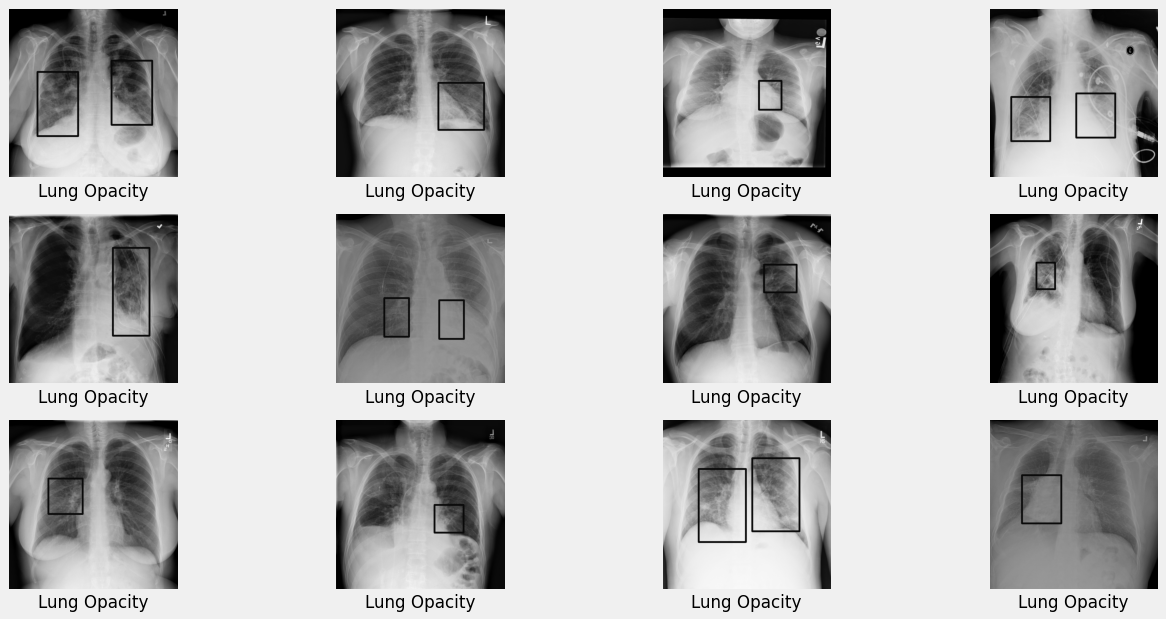

In [ ]:
no_images:int = 12
rows_to_display:list = random.sample(list(filtered_pa_data.index), no_images)
random.seed(13)
plt.figure(figsize=(20,10))
num:int = 0
for index_number in rows_to_display:
  num = num+1
  plt.subplot(3,4,num)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  path_image:str = os.path.join(train_folder_path,
                                filtered_pa_data.loc[index_number].Patient_ids+'.dcm')
  dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
  pixel_values:np.array = dicom_obj.pixel_array
  if type(filtered_pa_data.loc[index_number].coordinates[0]) == list:
    for coordinate in filtered_pa_data.loc[index_number].coordinates:
      cv2.rectangle(pixel_values, (int(coordinate[0]),
                                   int(coordinate[1])),
                     (int(coordinate[0])+int(coordinate[2]),
                      int(coordinate[1])+int(coordinate[3])), (10, 255, 0), 10)
  else:
    coordinate:list = filtered_pa_data.loc[index_number].coordinates
    cv2.rectangle(pixel_values, (int(coordinate[0]),
                                 int(coordinate[1])),
                   (int(coordinate[0])+int(coordinate[2]), int(coordinate[1])+int(coordinate[3])), (10, 255, 0), 10)
  plt.imshow(cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB),cmap="gray")
  plt.xlabel(filtered_pa_data.loc[index_number].Class)
plt.show()

#### Images which does not contain Pneumonia
**viewing AP view**

In [ ]:
filtered_ap_data:pd.DataFrame = coordinates_info.loc[(coordinates_info.View_position == 'AP') & (coordinates_info.Encoded_class == 0)]
filtered_ap_data.head(2)

,Patient_ids,Class,Encoded_class,Gender,Age,View_position,Modality,coordinates,No_rows,No_columns
0,f74e692e-1ccd-4f5e-bc19-482325025a41,Normal,0,F,62,AP,CR,"[nan, nan, nan, nan]",1024,1024
1,f7909c0c-c9f0-4c93-be7f-113926850ac3,No Lung Opacity / Not Normal,0,F,81,AP,CR,"[nan, nan, nan, nan]",1024,1024


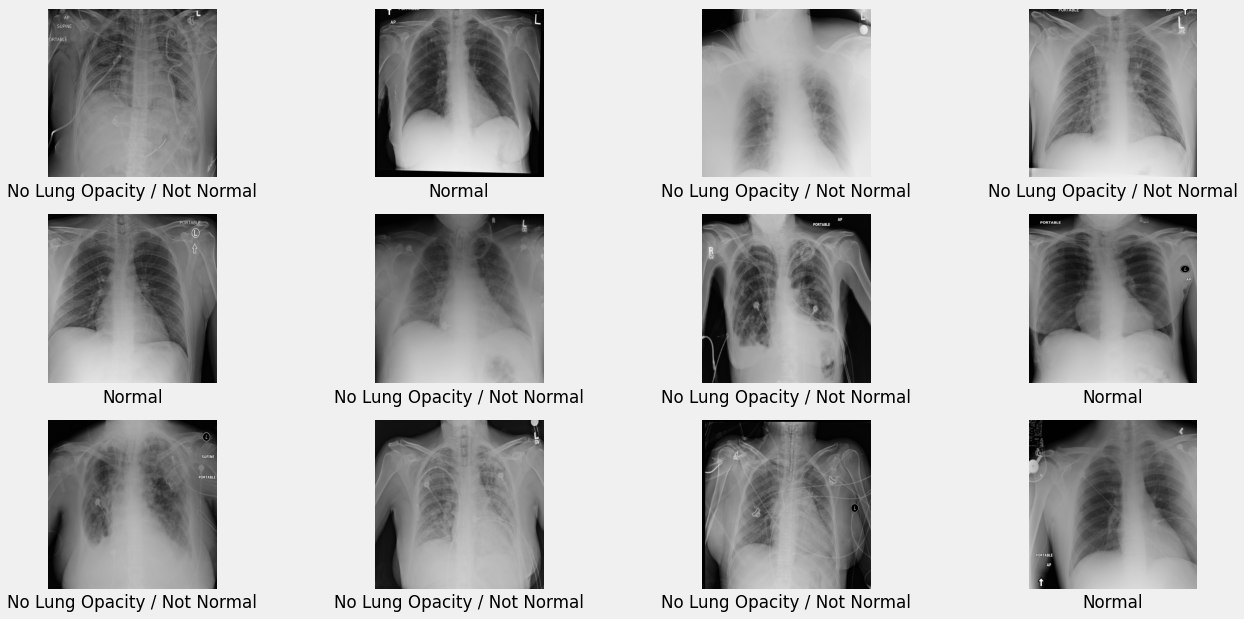

In [ ]:
no_images:int = 12
rows_to_display:list = random.sample(list(filtered_ap_data.index), no_images)
random.seed(13)
plt.figure(figsize=(20,10))
num:int = 0
for index_number in rows_to_display:
  num+=1
  plt.subplot(3,4,num)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  path_image:str = os.path.join(train_folder_path,
                                filtered_ap_data.loc[index_number].Patient_ids+'.dcm')
  dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
  pixel_values:np.array = dicom_obj.pixel_array
  plt.imshow(cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB),cmap="gray")
  plt.xlabel(filtered_ap_data.loc[index_number].Class)
plt.show()

**viewing PA view**

In [ ]:
filtered_pa_data:pd.DataFrame = coordinates_info.loc[(coordinates_info.View_position == 'PA') & (coordinates_info.Encoded_class == 0)]
filtered_pa_data.head(2)

,Patient_ids,Class,Encoded_class,Gender,Age,View_position,Modality,coordinates,No_rows,No_columns
2,f758a20a-506d-4e4e-97d7-54043148fb59,Normal,0,M,45,PA,CR,"[nan, nan, nan, nan]",1024,1024
4,f7a5fd29-dd8d-4f85-8164-69b2e83da35e,Normal,0,M,50,PA,CR,"[nan, nan, nan, nan]",1024,1024


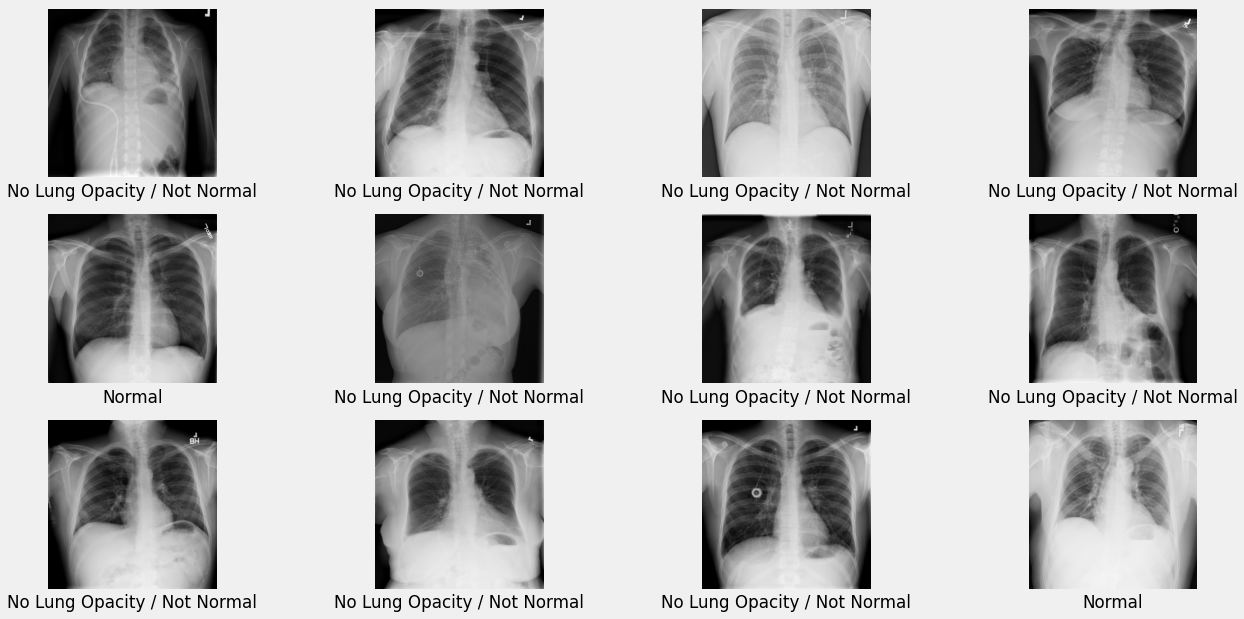

In [ ]:
no_images:int = 12
rows_to_display:list = random.sample(list(filtered_pa_data.index), no_images)
random.seed(13)
plt.figure(figsize=(20,10))
num:int = 0
for index_number in rows_to_display:
  num = num+1
  plt.subplot(3,4,num)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  path_image:str = os.path.join(train_folder_path,
                                filtered_pa_data.loc[index_number].Patient_ids+'.dcm')
  dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
  pixel_values:np.array = dicom_obj.pixel_array
  plt.imshow(cv2.cvtColor(pixel_values, cv2.COLOR_BGR2RGB),cmap="gray")
  plt.xlabel(filtered_pa_data.loc[index_number].Class)
plt.show()

## Modelling pipeline
**Pre-processing**
- Split data into train and validation set
- change the image size according to the pre-train model!!
- compute coordinates according to updated image size!!
- standardize the pixel values in the image!!

In [ ]:
x:pd.Series = coordinates_info['Patient_ids']
y:pd.Series = coordinates_info['Encoded_class']
x_train, x_test, y_train, y_test =   X_train, X_test, Y_train, Y_test = train_test_split(
      x, y,
      test_size=0.25,
      random_state=27,
      shuffle=True,
      stratify = y
  )
print(f'The shape of tain sample {len(x_train)}')
print(f'The shape of tain sample {len(x_test)}')

The shape of tain sample 20013
The shape of tain sample 6671


In [ ]:
def get_trainImage_fromDicom():
  for file_name,label in zip(x_train,y_train):
    #reading the image.
    path_image:str = os.path.join(train_folder_path,file_name+'.dcm')
    dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
    pixels_values:np.array = dicom_obj.pixel_array
    # pixels_values = cv2.cvtColor(pixels_values, cv2.COLOR_GRAY2RGB)
    #creating extra dimension
    pixels_values:np.array = np.stack((pixels_values,) * 3, -1)
    #resizing the image
    pixels_values:np.array = cv2.resize(pixels_values, (224,224),interpolation = cv2.INTER_NEAREST).astype('float16')
    #scaling the image.
    pixels_values:np.array = pixels_values/pixels_values.max()
    # pixels_values =  tf.expand_dims(pixels_values,
    #                                      axis=0)
    yield pixels_values,label

def get_testImage_fromDicom():
  for file_name,label in zip(x_test,y_test):
    #reading the image.
    path_image:str = os.path.join(train_folder_path,file_name+'.dcm')
    dicom_obj:pydicom.dataset.FileDataset = pydicom.read_file(path_image)
    pixels_values:np.array = dicom_obj.pixel_array
    #creating extra dimension
    pixels_values:np.array = np.stack((pixels_values,) * 3, -1)
    #resizing the image
    pixels_values:np.array = cv2.resize(pixels_values, (224,224),interpolation = cv2.INTER_NEAREST).astype('float16')
    #scaling the image.
    pixels_values:np.array = pixels_values/pixels_values.max()
    # pixels_values =  tf.expand_dims(pixels_values,
    #                                     axis=0)
    yield pixels_values,label

#hyper parameters
batch_size:int = 32
learning_rate:float = 1e-3
decay_rate:float = 1e-6
epochs:int=100

train_set_iterator = tf.data.Dataset.from_generator(get_trainImage_fromDicom,
                                                    output_signature=(
                                                      tf.TensorSpec(shape=(224,224,3), dtype=tf.float16),
                                                      tf.TensorSpec(shape=(), dtype=tf.int32)
                                                      )
                                                    )
test_set_iterator = tf.data.Dataset.from_generator(get_testImage_fromDicom,
                                                   output_signature=(
                                                      tf.TensorSpec(shape=(224,224,3), dtype=tf.float16),
                                                      tf.TensorSpec(shape=(), dtype=tf.int32)
                                                      )
                                                    )
train_set_iterator = train_set_iterator.batch(batch_size=batch_size)
for batch in train_set_iterator:
  arr,la = batch
  print(arr.shape)
  break

test_set_iterator = test_set_iterator.batch(batch_size=batch_size) 
for batch in test_set_iterator:
  arr,la = batch
  print(arr.shape)
  break

(32, 224, 224, 3)
(32, 224, 224, 3)


In [ ]:
# load model
resnet50v2_base_model = ResNet50V2(include_top=False, 
                   weights='imagenet',
                   input_shape=(224,224,3))
# summarize the model
resnet50v2_base_model.summary()

Model: "resnet50v2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_4[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                         

In [ ]:
tf.random.set_seed(21)
number_of_layers = len(resnet50v2_base_model.layers)
number_last_layers_to_be_trainable = 30
count = 0
for layer in resnet50v2_base_model.layers:
  if count < (number_of_layers-number_last_layers_to_be_trainable):
    layer.trainable = False
    count+=1
  else:
    count+=1

In [ ]:
prediction_layer = layers.Dense(1,activation = 'sigmoid')
flatten_layer = layers.Flatten()
inputs = tensorflow.keras.Input(shape=(224, 224, 3))
x = tensorflow.keras.applications.resnet_v2.preprocess_input(inputs)
x = resnet50v2_base_model(x)
x = layers.Dropout(0.2)(x)
x = flatten_layer(x)
outputs = prediction_layer(x)
resnetv250_finetuned_model = tensorflow.keras.Model(inputs, outputs)

In [ ]:
adam = tensorflow.keras.optimizers.Adam(learning_rate=learning_rate,decay=decay_rate)
resnetv250_finetuned_model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
weights_path:str = os.path.join(os.getcwd(),'saving_weights_training','classification')

In [ ]:
def scheduler(epoch, lr):
  if epoch < 20:
    return lr
  else:
    return lr * tensorflow.math.exp(-0.1)

early_stopping = EarlyStopping(monitor='val_loss',mode = "min",patience=5)
model_checkpoint=tensorflow.keras.callbacks.ModelCheckpoint(weights_path, 
                                                    save_best_only=True,
                                                    save_weights_only=True, 
                                                    monitor='val_accuracy', 
                                                    mode='max', 
                                                    verbose=1)

lr_schedular = tensorflow.keras.callbacks.LearningRateScheduler(scheduler)
import random
import numpy as np
import tensorflow as tf
random.seed(2)
np.random.seed(2)
tf.random.set_seed(2)

history = resnetv250_finetuned_model.fit(
  train_set_iterator,
  validation_data=test_set_iterator,
  batch_size=batch_size,
  epochs=epochs,
  callbacks=[early_stopping,model_checkpoint,lr_schedular],
  workers = 2*batch_size,
  verbose=1
)

Epoch 1/100
    285/Unknown - 6842s 24s/step - loss: 0.5763 - accuracy: 0.7662

**Training is being done on local system!!**